In [103]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
import plotly.express as px
cf.go_offline()

Areas = pd.read_csv('Areas.csv', sep='\t')
Current = pd.read_csv('Current_Data.csv', sep='\t')
Items = pd.read_csv('Items.csv', sep='\t')
Periods = pd.read_csv('Period_Names.csv', sep='\t')
Series = pd.read_csv('Series.csv', sep='\t')

# I cleaned the data and made the appropriate merges (there is WHITESPACE ** Make Sure To Clean Whitespace) **

complete_df = pd.merge(Series, Areas, on='area_code').merge(Current, on='series_id        ').merge(Items, on='item_code').merge(Periods, on='period')
complete_df = complete_df.rename(columns = {'series_id        ': 'series_id', '       value': 'value'})
complete_df['series_id'] = complete_df['series_id'].str.strip()
complete_df['value'] = complete_df['value'].str.strip()

# Dropping the appropriate columns

complete_df.drop(['period_name', 'footnote_codes_x', 'footnote_codes_y', 'series_title', 'series_id', 'area_code', 'period', 'begin_year', 'begin_period', 'end_year', 'end_period'], axis=1, inplace=True)

# Dropping certain 'value' rows containing the hyphen (-) as filler

condition = complete_df[complete_df['value'] == '-'].index
complete_df.drop(condition, axis=0, inplace=True)

# Changing Certain Data Types from Strings to Float, Int, or DateTime

complete_df['value'] = complete_df['value'].astype(float)

# Changing Parentheses to another character due to regex

complete_df['item_name'] = complete_df['item_name'].str.replace('(', '').str.replace(')', '')

# Showing the cleaned DataFrame

complete_df

,item_code,area_name,year,value,item_name,period_abbr
0,701111,U.S. city average,1995,0.238,"Flour, white, all purpose, per lb. 453.6 gm",JAN
1,701111,U.S. city average,1996,0.262,"Flour, white, all purpose, per lb. 453.6 gm",JAN
2,701111,U.S. city average,1997,0.309,"Flour, white, all purpose, per lb. 453.6 gm",JAN
3,701111,U.S. city average,1998,0.299,"Flour, white, all purpose, per lb. 453.6 gm",JAN
4,701111,U.S. city average,1999,0.297,"Flour, white, all purpose, per lb. 453.6 gm",JAN
...,...,...,...,...,...,...
191080,FS1101,U.S. city average,2020,3.533,"Butter, stick, per lb. 453.6 gm",DEC
191081,FS1101,U.S. city average,2021,3.474,"Butter, stick, per lb. 453.6 gm",DEC
191082,FS1101,West,2021,3.772,"Butter, stick, per lb. 453.6 gm",DEC
191083,703611,Northeast,1995,3.315,"Steak, sirloin, USDA Choice, bone-in, per lb. ...",DEC


 701111


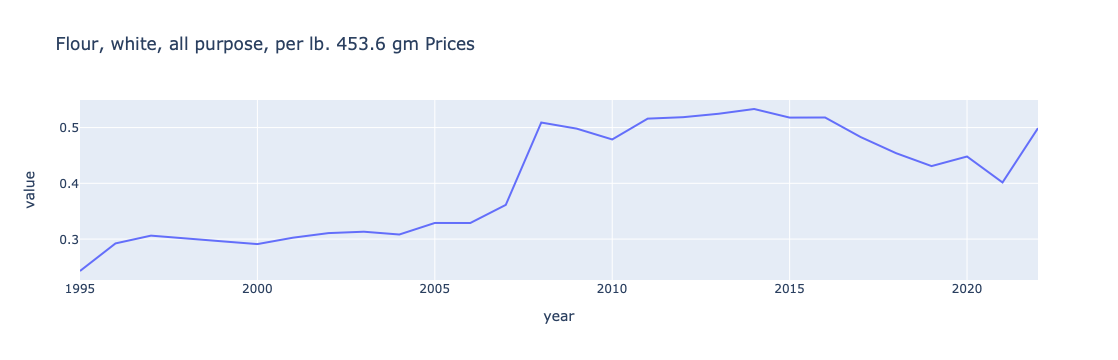

In [104]:
# Function that takes in an item_code, and outputs the change in price of that item over a given interval

def getCategoryByCode(item_code=None):
    item_code = input()
    byItemCode = pd.DataFrame(complete_df.groupby(['year', 'item_code', 'item_name']).value.mean()).reset_index()
    if item_code in byItemCode['item_code'].values:
        category = byItemCode[byItemCode['item_code'] == item_code]
        lineplot = px.line(category, x='year', y='value', title=category['item_name'].unique()[0] + " Prices")
        return lineplot
    else:
        print('Sorry, that item code could not be located.')

# Function that takes in item_name as a query, narrows down the search to a finite list, and allows user to go in depth on the item

def getCategoryByName(item_name=None):
    item_name = input().upper()
    byItemName = pd.DataFrame(complete_df.groupby(['year', 'item_name']).value.mean()).reset_index()
    byItemName['item_name'] = byItemName['item_name'].apply(lambda x: x.upper())
    filtered = byItemName[byItemName['item_name'].str.contains(item_name)]
    if filtered['item_name'].nunique() > 1:
        print('Insert a more specific query, as there is more than one result')
        print('Here is a list of the unique values related to your query: ' + str(list(filtered['item_name'].unique())))
    elif filtered['item_name'].nunique() == 0:
        print('This item either does not exist, please input an item that exists.')
    else:
        lineplot = px.line(filtered, x='year', y='value', title=filtered['item_name'].unique()[0] + " Prices")
        return lineplot

getCategoryByCode()

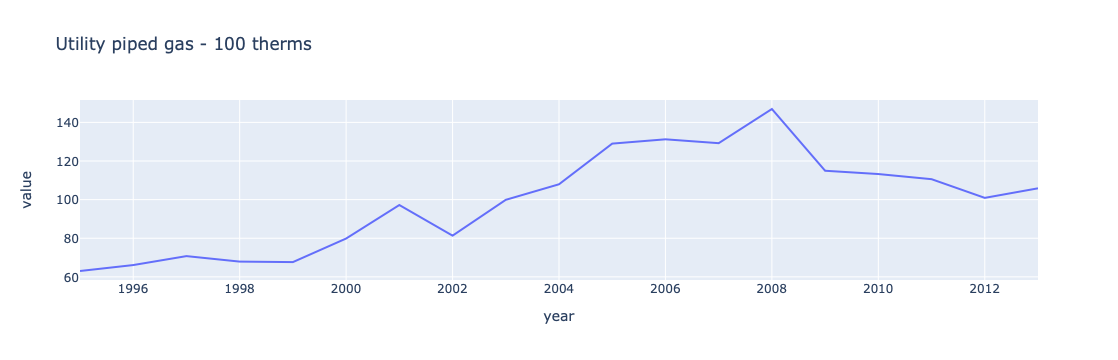

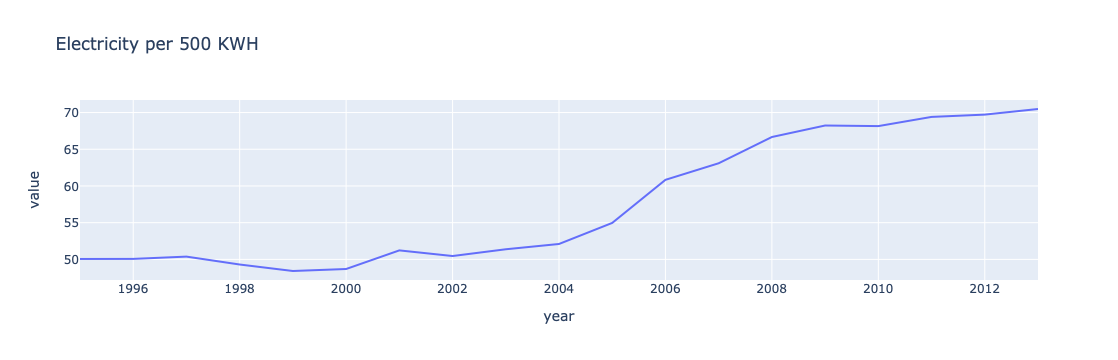

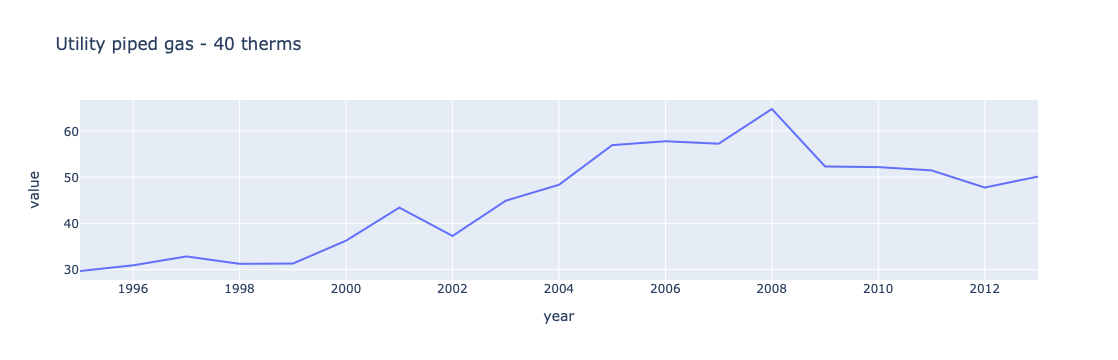

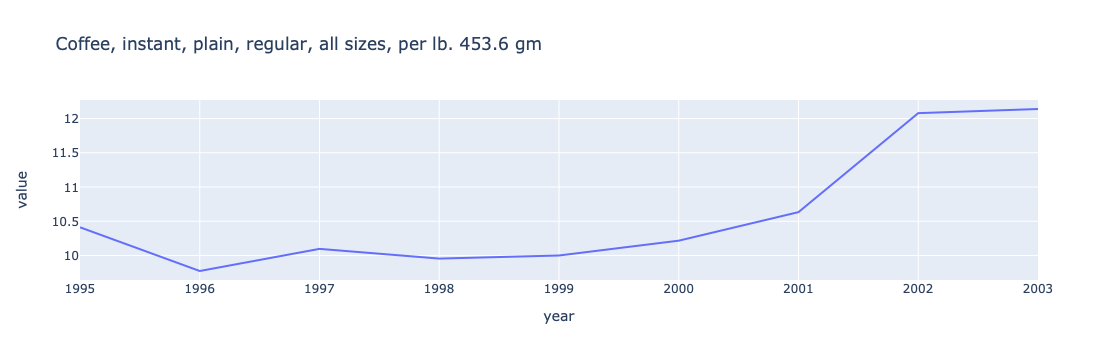

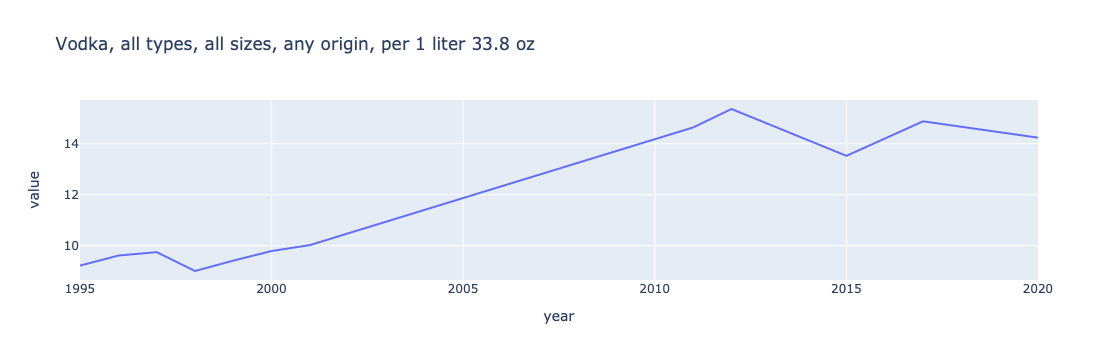

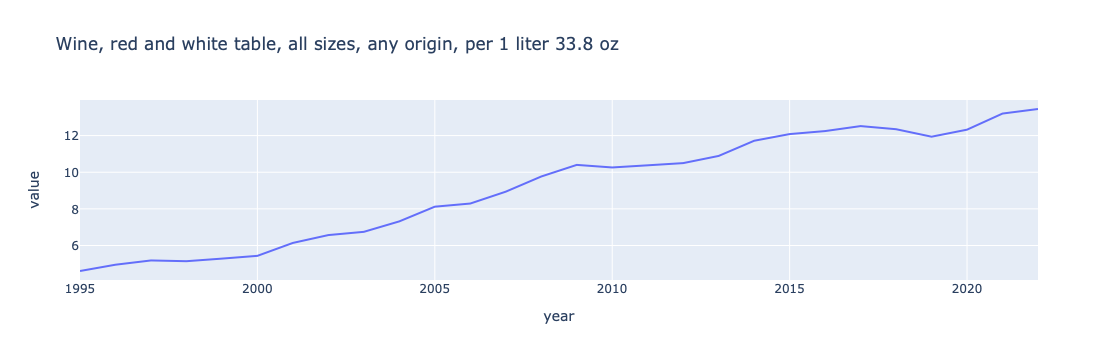

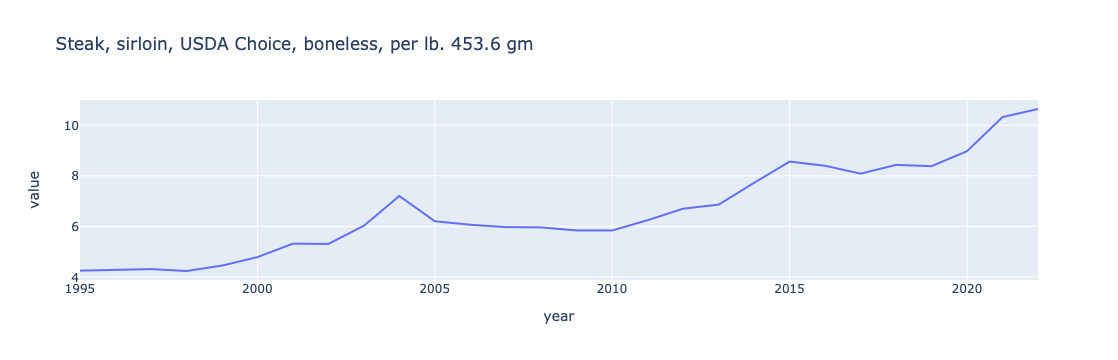

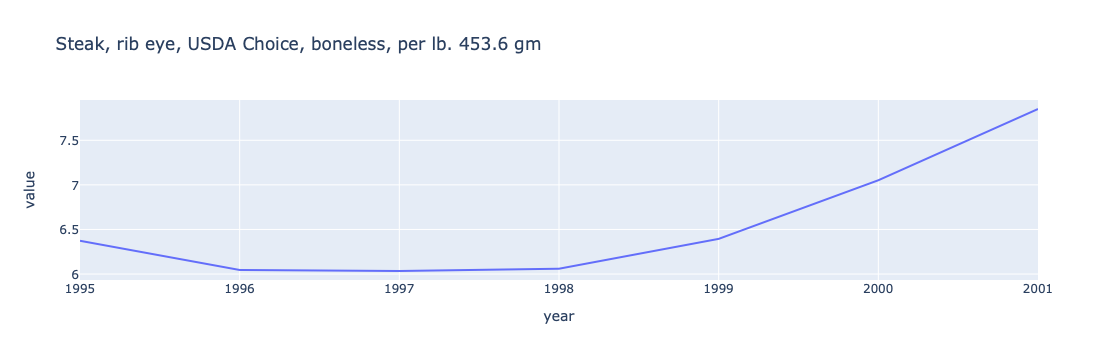

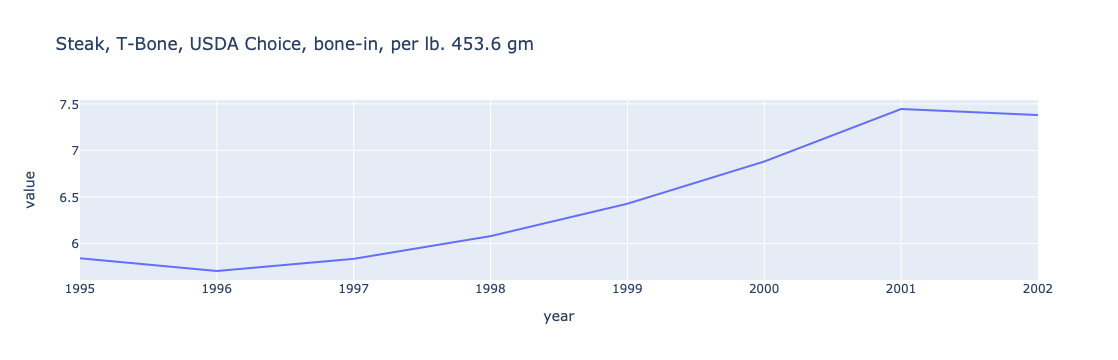

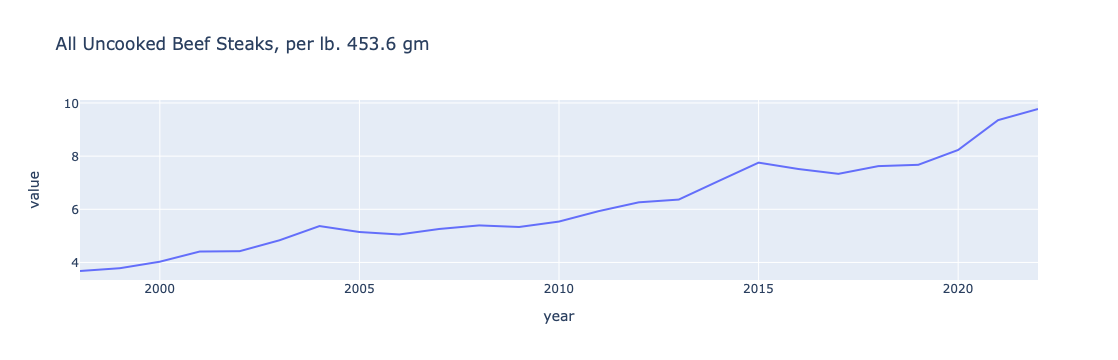

In [105]:
# Looking at top 10 most expensive items

topTenExpensive = pd.DataFrame((complete_df.groupby(['item_name']).value.mean()).sort_values(ascending=False).reset_index().head(10))
byItem = pd.DataFrame((complete_df.groupby(['year', 'item_name']).value.mean()).reset_index())

for name in topTenExpensive['item_name']:
    fig = px.line(byItem[byItem['item_name'] == name], x='year', y='value', title=name)
    fig.show()

 2022


<Axes: title={'center': '2022 Price Distribution'}, xlabel='value', ylabel='Count'>

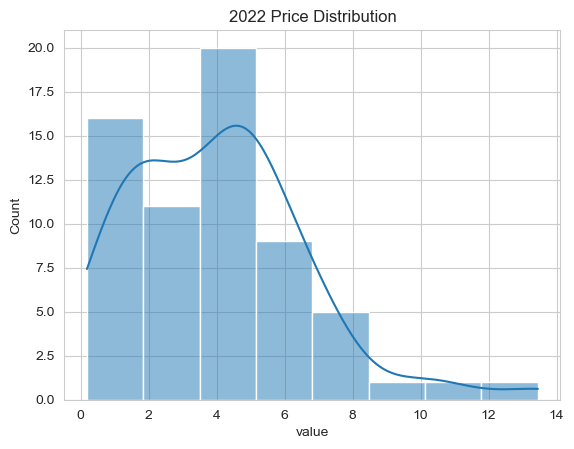

In [108]:
# Allows user to enter a year between 1995 and 2022 in order to visualize the price distribution of items for the given year

def Price_Dist(year=None):
    by_year = pd.DataFrame(complete_df.groupby(['year', 'item_name']).value.mean()).reset_index()
    year = int(input())
    if year in by_year['year'].values:
        distribution = by_year[by_year['year'] == year]
        plot = sns.histplot(x='value', data=distribution, kde=True)
        plt.title(str(year) + ' Price Distribution')
        return plot
    else:
        print('This is not a valid year, pick a year between 1995 and 2022')

Price_Dist()

Plotting the Top 10 most volatile items over 1995-2022

                                           item_name        STD
0                     Utility piped gas - 100 therms  30.796561
1                      Utility piped gas - 40 therms  13.462034
2                            Electricity per 500 KWH  13.389332
3  Wine, red and white table, all sizes, any orig...   3.213170
4  Vodka, all types, all sizes, any origin, per 1...   1.967436
5  Steak, sirloin, USDA Choice, boneless, per lb....   1.898611
6         All Uncooked Beef Steaks, per lb. 453.6 gm   1.665545
7                    Bacon, sliced, per lb. 453.6 gm   1.415447
8  Ground beef, lean and extra lean, per lb. 453....   1.379521
9  Steak, round, USDA Choice, boneless, per lb. 4...   1.290679


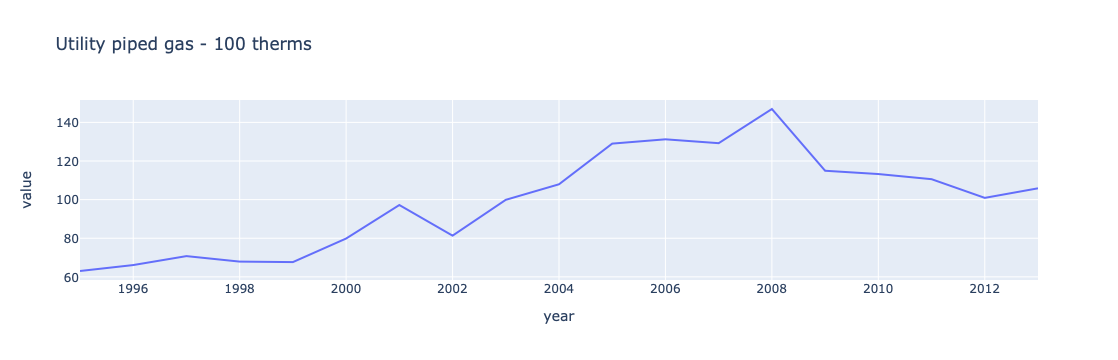

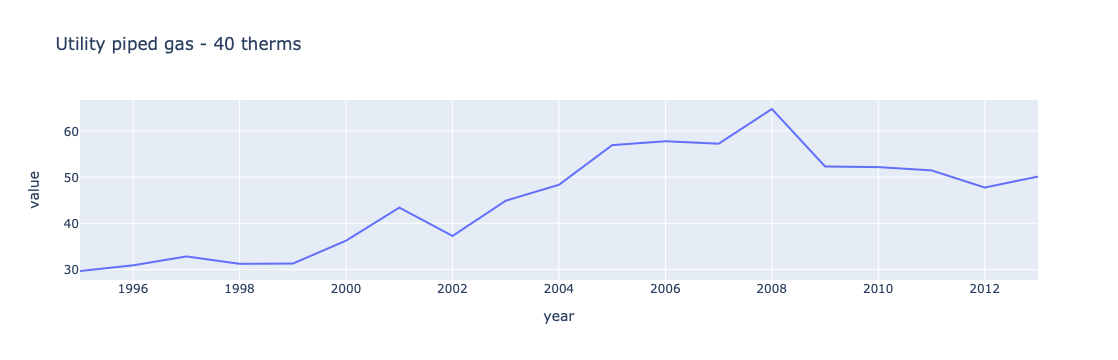

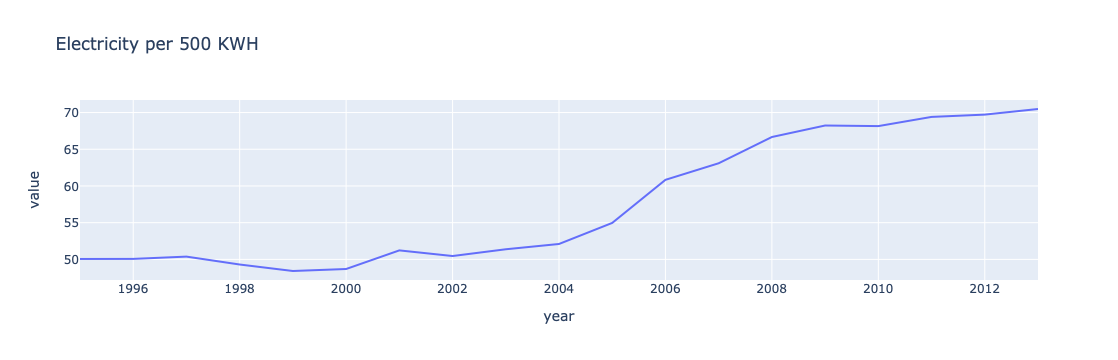

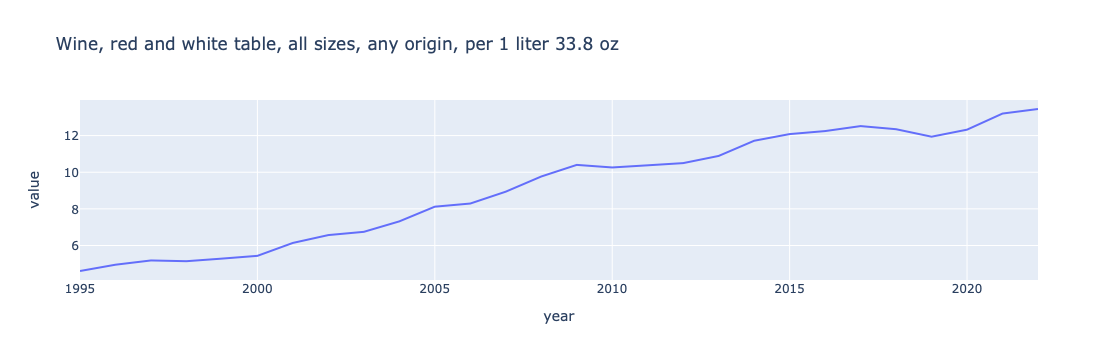

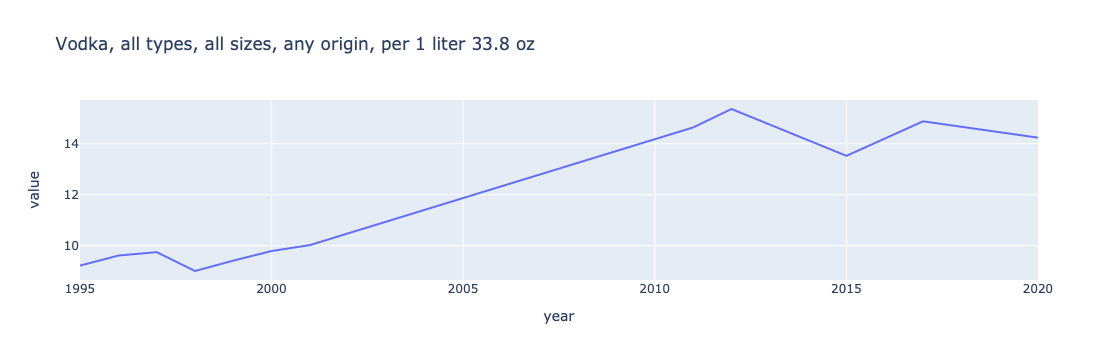

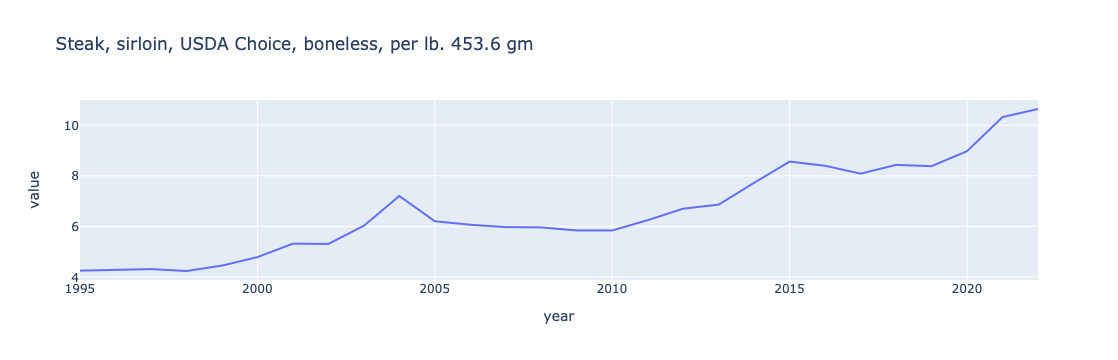

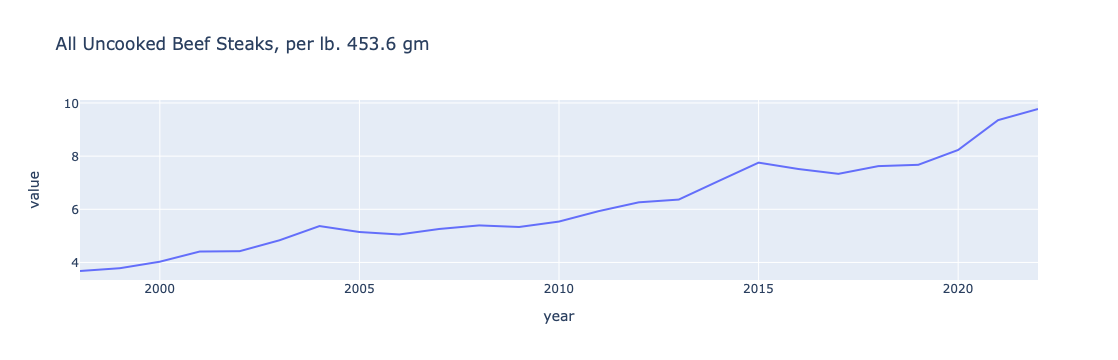

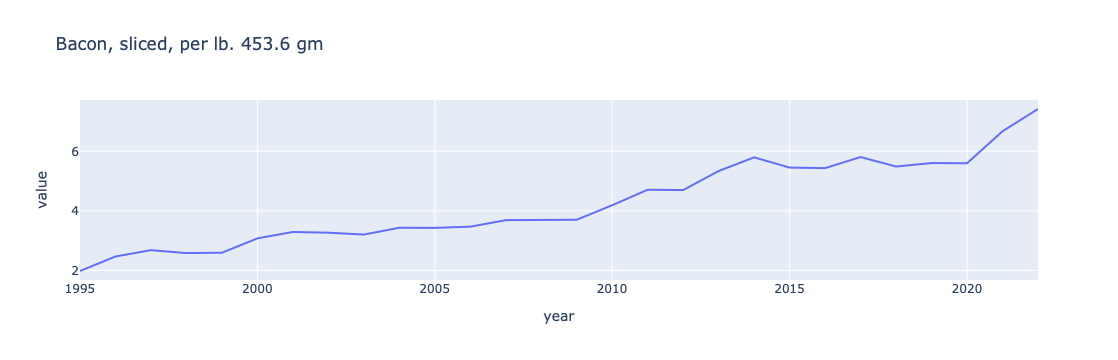

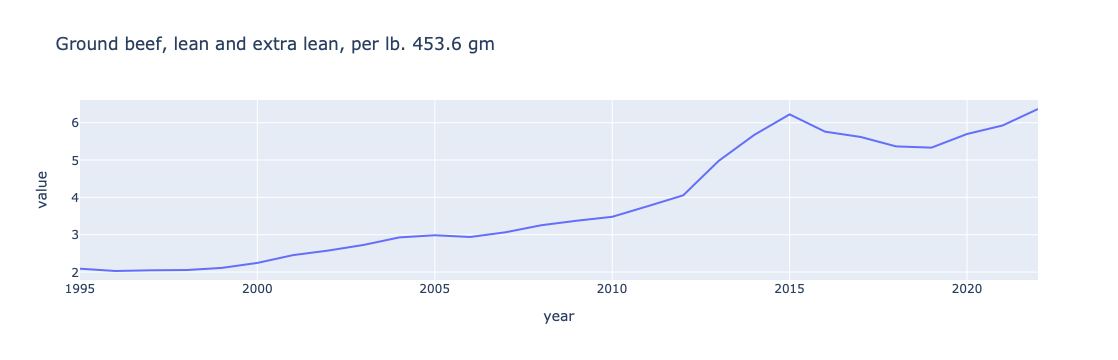

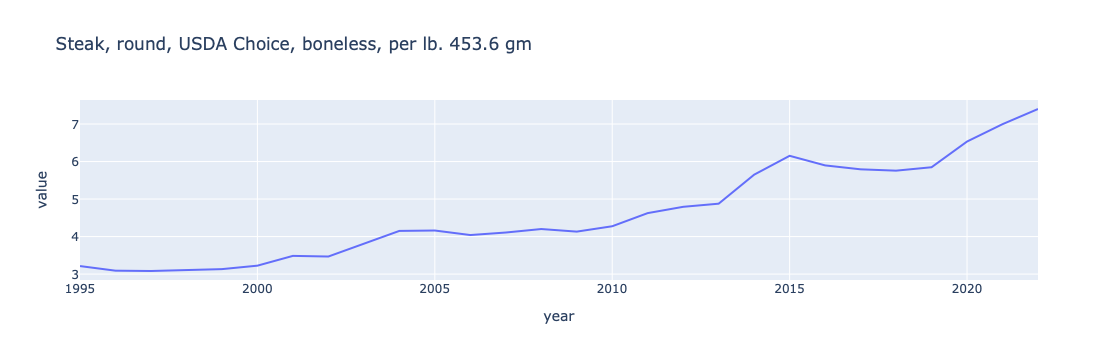

In [121]:
# Items Ranked by STD (Most Volatile)

STD = pd.DataFrame(complete_df.groupby(['item_name']).value.std()).sort_values(by='value', ascending=False).reset_index().head(10)
byItem = pd.DataFrame((complete_df.groupby(['year', 'item_name']).value.mean()).reset_index())

print('Plotting the Top 10 most volatile items over 1995-2022')
print('')

STD.rename(columns = {'value': 'STD'}, inplace=True)
print(STD)

for name in STD['item_name']:
    fig = px.line(byItem[byItem['item_name'] == name], x='year', y='value', title=name)
    fig.show()

